In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('../data/auctions.csv', 
                 engine='c', 
                 usecols=['date', 'device_id', 'platform','ref_type_id', 'source_id'], 
                 dtype={'device_id':'category','platform':np.int8, 'ref_type_id':np.int8, 'source_id':np.int8})

In [3]:
df.columns

Index(['date', 'device_id', 'platform', 'ref_type_id', 'source_id'], dtype='object')

In [4]:
df.head(5)

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


# Source_id cantidades

In [5]:
df.source_id.value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [6]:
df_source_count = df[['source_id','platform']]
df_source_count = df_source_count.groupby('source_id').count()
df_source_count = df_source_count['platform']

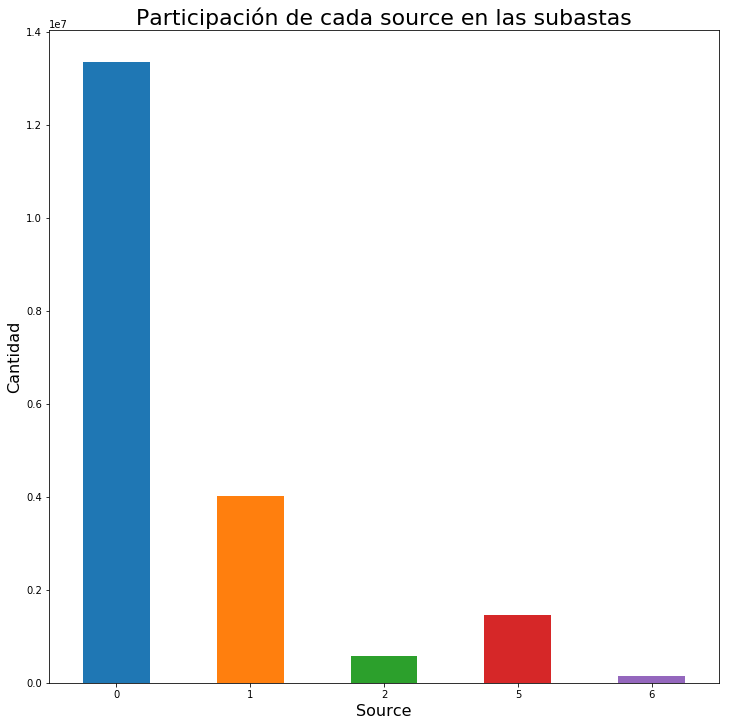

In [7]:
f = plt.figure()
plt.title('Participación de cada source en las subastas',fontsize=22)
ax = df_source_count.plot(kind='bar',rot=0,figsize=(12,12));
ax.set_ylabel('Cantidad',fontsize=16);
ax.set_xlabel('Source',fontsize=16);
plt.savefig("res/auctions_sources_quantity.png",dpi=100)

In [8]:
esto = df.groupby(['source_id','platform']).count().unstack()

In [9]:
df_source_per_platform = df[['source_id','platform','device_id']]

In [10]:
df_source_per_platform = df_source_per_platform.groupby(['source_id','platform']).count().unstack()

In [11]:
df_source_per_platform.columns = df_source_per_platform.columns.droplevel()

<Figure size 432x288 with 0 Axes>

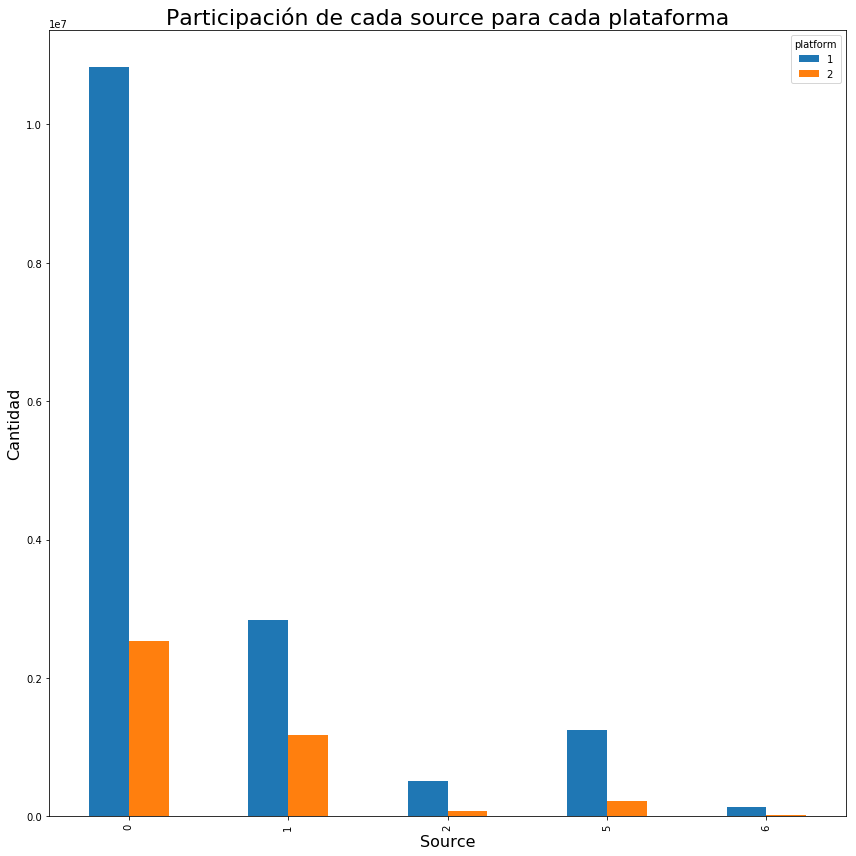

In [13]:
f = plt.figure()
ax = df_source_per_platform.plot(kind='bar', figsize=(12,12))
plt.title('Participación de cada source para cada plataforma', fontsize=22);
plt.ylabel('Cantidad', fontsize=16);
plt.xlabel('Source', fontsize=16);
plt.tight_layout()
plt.savefig("res/auctions_sources_per_platform.png",dpi=100)
plt.show()